<a href="https://colab.research.google.com/github/giovanni-lucarelli/distribution-shift/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Set seed for reproducibility
np.random.seed(42)

# Parameters for the multivariate normal distribution
mean = np.zeros(7)  # Mean vector (7 dimensions)
cov = np.eye(7)    # Identity covariance matrix (7x7)

# Number of samples
N = 1000

# Generate samples
X = np.random.multivariate_normal(mean, cov, N)

# Define the polynomial function (no interactions)
def polynomial_features(X):
    return np.column_stack([np.ones(len(X)), X, X**2]) # bias, linear and quadratic

# Define the logistic (sigmoid) function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the deterministic weights for the polynomial features (bias, linear terms, quadratic terms)
# Adjusted weights to match the number of features generated by polynomial_features
weights = np.array([0.1, 0.2, -0.3, 0.4, -0.5, 0.6, -0.7,
                   0.05, -0.06, 0.07, -0.08, 0.09, -0.1, 0.11, -0.01]) #15 weights: 1 for the bias + 7 linear + 7 quadratic


# Generate polynomial features
X_poly = polynomial_features(X)


# Compute the linear combination of features and weights
z = np.dot(X_poly, weights)

# Apply the sigmoid function to get probabilities
probabilities = sigmoid(z)

# Generate the target variable y based on the probabilities (0 or 1)
y = np.random.binomial(1, probabilities)

# Create a Pandas DataFrame for the generated data
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(7)])
df['target'] = y

print(df.head())
print(df['target'].value_counts())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   0.496714  -0.138264   0.647689   1.523030  -0.234153  -0.234137   
1   0.767435  -0.469474   0.542560  -0.463418  -0.465730   0.241962   
2  -1.724918  -0.562288  -1.012831   0.314247  -0.908024  -1.412304   
3  -0.225776   0.067528  -1.424748  -0.544383   0.110923  -1.150994   
4  -0.600639  -0.291694  -0.601707   1.852278  -0.013497  -1.057711   

   feature_7  target  
0   1.579213       0  
1  -1.913280       1  
2   1.465649       0  
3   0.375698       1  
4   0.822545       1  
target
1    529
0    471
Name: count, dtype: int64


Miscela statistica della multivariata precedente e di una nuova e predizioni deterministiche sul nuovo sample (stessa sigmoide, stessa polinomiale)

In [29]:
# Parameters for the first multivariate normal distribution
mean1 = np.zeros(7)  # Mean vector (7 dimensions)
cov1 = np.eye(7)    # Identity covariance matrix (7x7)

# Parameters for the second multivariate normal distribution
mean2 = np.ones(7) * 3  # Mean vector (7 dimensions)
cov2 = np.eye(7) * 2  # Scaled identity covariance matrix (7x7)


# Mixing probability
pi = 0.7  # Probability of drawing from the first distribution

# Number of samples
N = 1000

# Generate samples
samples = np.random.choice([0, 1], size=N, p=[pi, 1-pi]) #0 for the first distribution and 1 for the second distribution
X = np.zeros((N,7))
for i in range(N):
  if samples[i] == 0:
    X[i] = np.random.multivariate_normal(mean1, cov1)
  else:
    X[i] = np.random.multivariate_normal(mean2, cov2)


# Generate polynomial features
X_poly = polynomial_features(X)


# Compute the linear combination of features and weights
z = np.dot(X_poly, weights)

# Apply the sigmoid function to get probabilities
probabilities = sigmoid(z)

# Generate the target variable y based on the probabilities (0 or 1)
y = np.random.binomial(1, probabilities)

# Create a Pandas DataFrame for the generated data
df1 = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(7)])
df1['target'] = y

print(df1.head())
print(df1['target'].value_counts())

   feature_1  feature_2  feature_3  feature_4  feature_5  feature_6  \
0   1.488883   3.488489   2.456685   1.922181   6.657121   3.592627   
1   1.137777  -1.421350   1.752292  -2.508957  -0.768766  -0.459032   
2   3.309314   2.764088   2.983033   1.616867   0.882594   4.027443   
3   1.584494  -0.790017   0.692815  -0.283707   1.190475   1.021963   
4   2.519832   4.358963   3.914861   2.032055   1.122209   2.591953   

   feature_7  target  
0   3.867288       0  
1   0.581723       1  
2   3.981049       0  
3   0.211209       1  
4   5.143119       0  
target
1    507
0    493
Name: count, dtype: int64


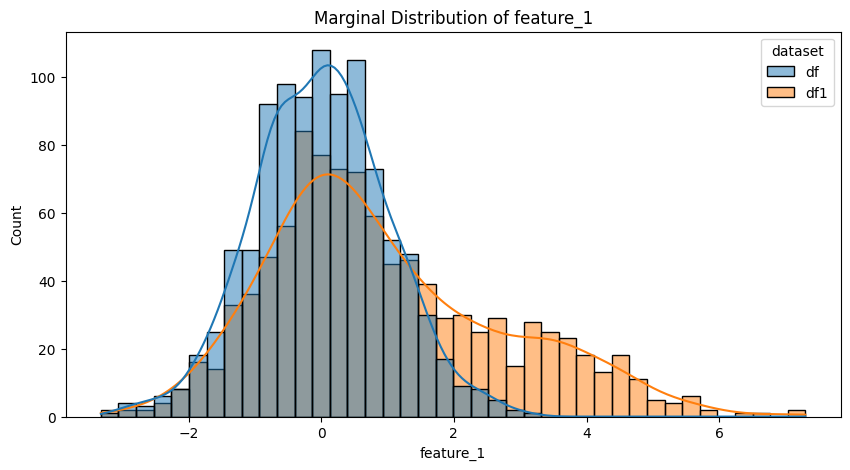

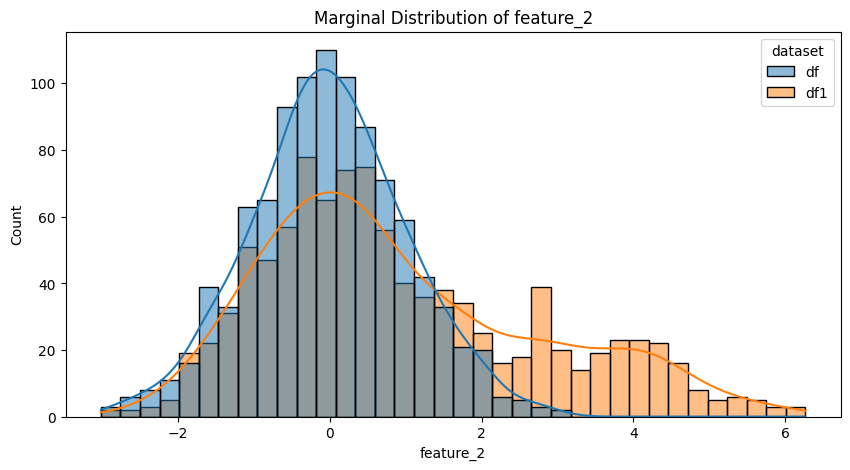

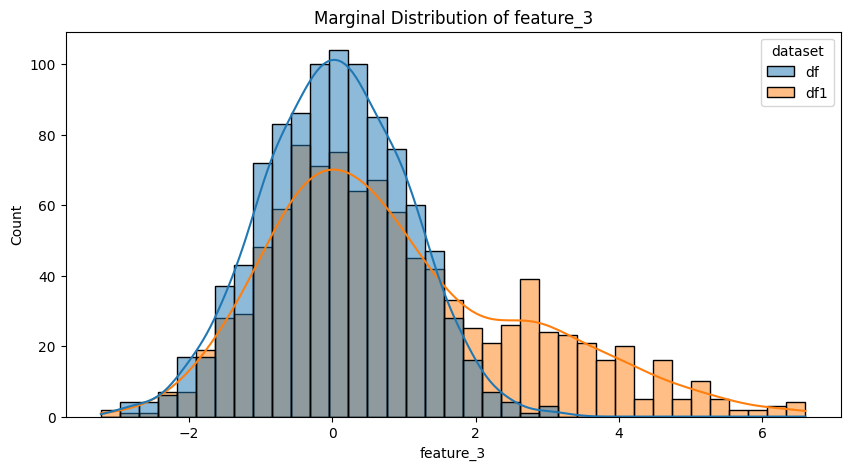

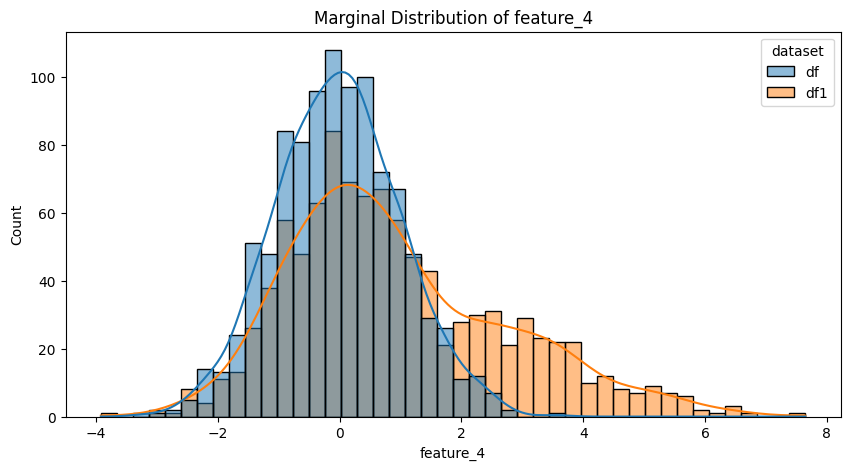

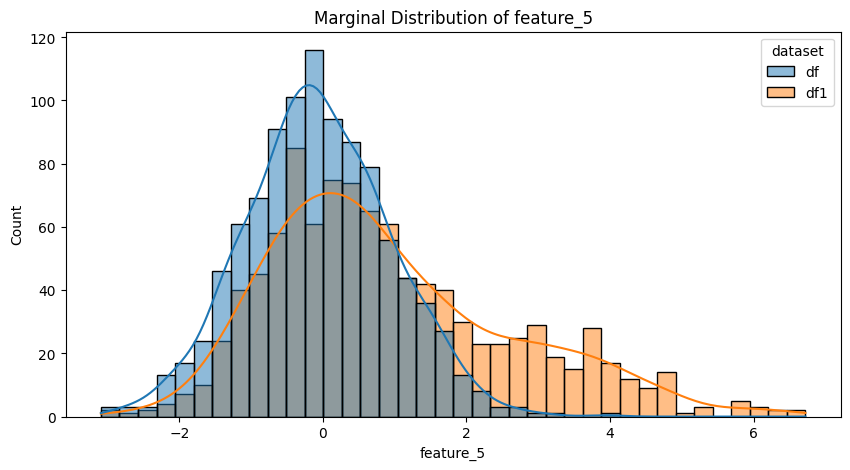

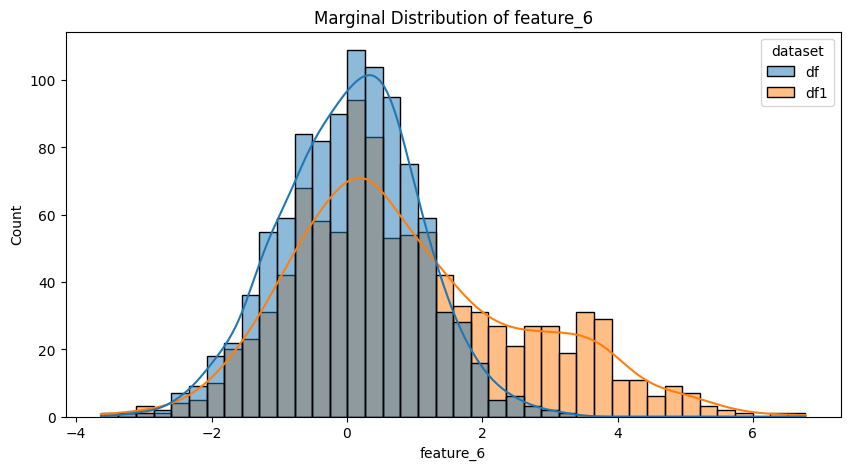

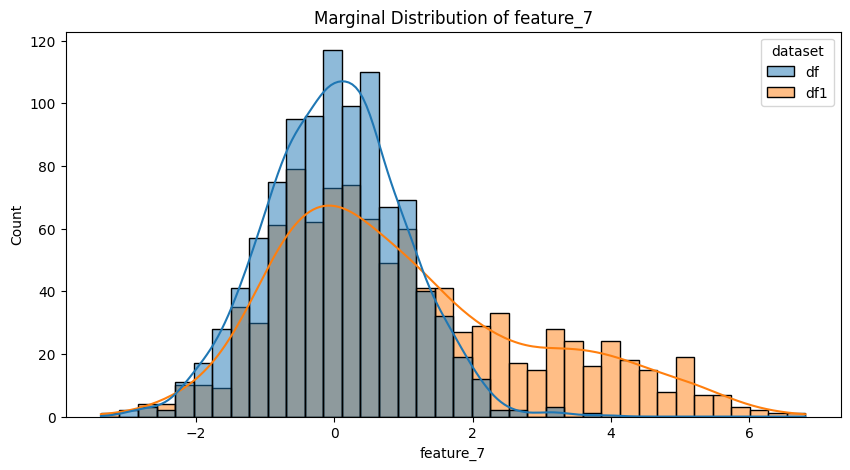

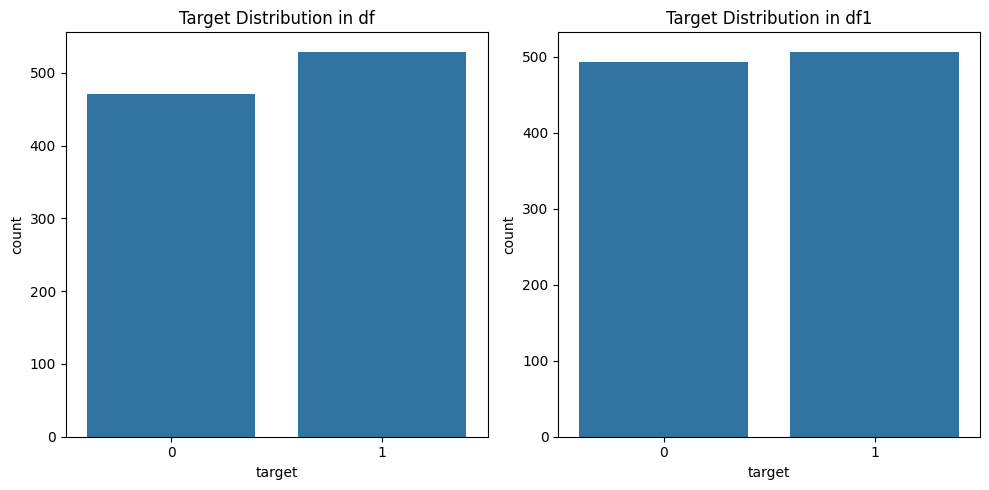

Descriptive statistics for df:
         feature_1    feature_2    feature_3    feature_4    feature_5  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.000000   
mean     -0.005105    -0.020263     0.021551    -0.028707    -0.065911   
std       0.998626     1.020223     1.001217     1.013059     1.001289   
min      -3.170426    -3.019512    -2.921350    -3.241267    -2.940389   
25%      -0.671087    -0.661100    -0.653363    -0.737420    -0.716266   
50%       0.002934    -0.030351     0.021995    -0.041314    -0.096668   
75%       0.648475     0.652821     0.712824     0.643030     0.597575   
max       3.098299     2.985259     3.109919     3.529055     3.926238   

         feature_6    feature_7       target  
count  1000.000000  1000.000000  1000.000000  
mean      0.040487     0.011064     0.529000  
std       1.003571     0.976235     0.499408  
min      -3.176704    -2.899514     0.000000  
25%      -0.631029    -0.646979     0.000000  
50%       0.090667  

In [30]:
# Concatenate the two dataframes
df_concat = pd.concat([df.assign(dataset='df'), df1.assign(dataset='df1')])

# Plotting the marginal distributions of all the features of df and df1
for i in range(7):
  plt.figure(figsize=(10, 5))
  sns.histplot(data=df_concat, x=f'feature_{i+1}', hue='dataset', kde=True)
  plt.title(f'Marginal Distribution of feature_{i+1}')
  plt.show()

# Compare the target variables
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='target')
plt.title('Target Distribution in df')

plt.subplot(1, 2, 2)
sns.countplot(data=df1, x='target')
plt.title('Target Distribution in df1')
plt.tight_layout()
plt.show()

# Display the descriptive statistics of all the features
print("Descriptive statistics for df:")
print(df.describe())

print("\nDescriptive statistics for df1:")
print(df1.describe())

In [31]:
df.to_csv('df.csv', index=False)
df1.to_csv('df1.csv', index=False)

multinormali traslazione + rotazione

da sistemare -> matrice di covarianza non semidefinita positiva dopo la rotazione ???

In [72]:
def generate_positive_semidefinite_matrix(n):
    # Generate a random matrix
    A = np.random.rand(n, n)*10
    # Make it symmetric
    A_symmetric = (A + A.T) / 2
    # Ensure it is positive semi-definite
    # by adding a positive constant to its diagonal
    A_psd = A_symmetric + 3* np.eye(n)
    return A_psd

# Generate a 7x7 positive semi-definite matrix
n = 7
psd_matrix = generate_positive_semidefinite_matrix(n)
psd_matrix

array([[12.29129229,  3.76462847,  7.03408376,  7.00700455,  5.02716226,
         6.52655228,  8.87889056],
       [ 3.76462847,  6.73593765,  5.84485699,  5.75524238,  2.9120107 ,
         6.19735271,  6.03983181],
       [ 7.03408376,  5.84485699,  6.72560745,  5.26363387,  4.90273349,
         8.97570479,  5.00292794],
       [ 7.00700455,  5.75524238,  5.26363387,  9.35656399,  7.69848396,
         6.77344783,  2.62969419],
       [ 5.02716226,  2.9120107 ,  4.90273349,  7.69848396,  6.88810412,
         3.77831971,  5.66529912],
       [ 6.52655228,  6.19735271,  8.97570479,  6.77344783,  3.77831971,
        11.47795712,  4.19769863],
       [ 8.87889056,  6.03983181,  5.00292794,  2.62969419,  5.66529912,
         4.19769863, 11.63949359]])

In [102]:
def orthogonal_rotation(matrix):
    # Generate a random orthogonal matrix
    q, _ = np.linalg.qr(np.random.rand(matrix.shape[0], matrix.shape[1]))
    rotated_matrix = q @ matrix @ q.T
    return rotated_matrix

rotated_psd_matrix = orthogonal_rotation(psd_matrix)
rotated_psd_matrix

Original PSD Matrix:
[[12.29130029  3.76462847  7.03408376  7.00700455  5.02716226  6.52655228
   8.87889056]
 [ 3.76462847  6.73594565  5.84485699  5.75524238  2.9120107   6.19735271
   6.03983181]
 [ 7.03408376  5.84485699  6.72560745  5.26363387  4.90273349  8.97570479
   5.00292794]
 [ 7.00700455  5.75524238  5.26363387  9.35656399  7.69848396  6.77344783
   2.62969419]
 [ 5.02716226  2.9120107   4.90273349  7.69848396  6.88810412  3.77831971
   5.66529912]
 [ 6.52655228  6.19735271  8.97570479  6.77344783  3.77831971 11.47795712
   4.19769863]
 [ 8.87889056  6.03983181  5.00292794  2.62969419  5.66529912  4.19769863
  11.63949359]]

Orthogonal Matrix:
[[-0.34259406 -0.3880038   0.24012405  0.71180295  0.00827965  0.37059621
   0.17421039]
 [-0.32677258  0.22323558 -0.63723945 -0.04949671  0.49821732  0.26989159
   0.33734189]
 [-0.41339817  0.41804784  0.45287396 -0.36620737 -0.31674396  0.31099823
   0.34364031]
 [-0.50192396 -0.06813819 -0.48225733  0.05536116 -0.6417154  -0.206

array([[  5.04299724,   1.56425344,   0.67968972, -10.70879677,
          2.34362473,  -2.10868858,  -7.47748034],
       [  1.56425344,   1.66492802,   1.04600686,  -1.92531974,
          1.25716233,  -2.54699441,   1.10336767],
       [  0.67968972,   1.04600686,   6.85029903,  -4.03478718,
         -1.01481055,  -1.47645066,  -3.44978237],
       [-10.70879677,  -1.92531974,  -4.03478718,  27.51834318,
          2.22233859,  13.07344572,  11.12706354],
       [  2.34362473,   1.25716233,  -1.01481055,   2.22233859,
          4.69494635,   1.37320884,  -0.89850517],
       [ -2.10868858,  -2.54699441,  -1.47645066,  13.07344572,
          1.37320884,   9.37255075,   3.64943472],
       [ -7.47748034,   1.10336767,  -3.44978237,  11.12706354,
         -0.89850517,   3.64943472,   9.97090763]])

<ipython-input-103-33603bbaaf21>:13: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X1 = np.random.multivariate_normal(mean1, cov1, N)
<ipython-input-103-33603bbaaf21>:14: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  X2 = np.random.multivariate_normal(mean2, cov2, N)


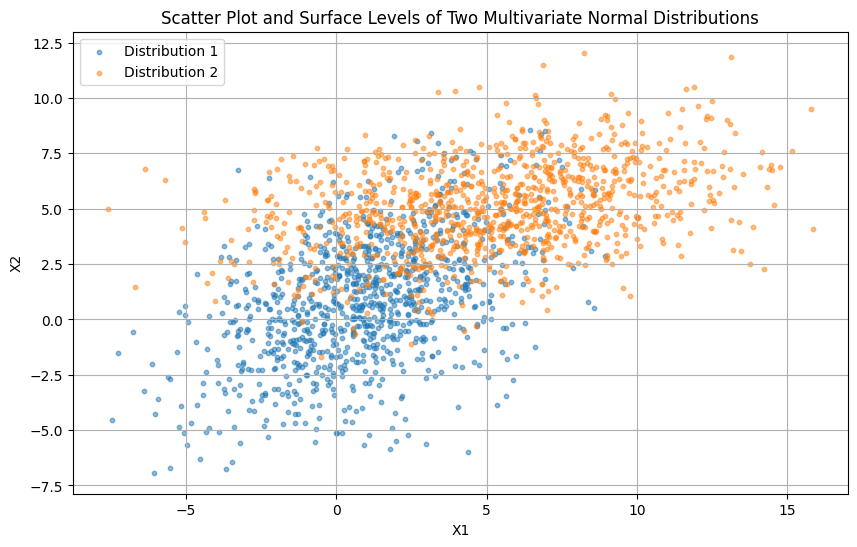

In [103]:
# Parameters for the first multivariate normal distribution
mean1 = np.ones(7)  # Mean vector (7 dimensions)
cov1 = psd_matrix    # Covariance matrix (7x7)

# Parameters for the second multivariate normal distribution
mean2 = np.ones(7) * 5  # Mean vector (7 dimensions)
cov2 = rotated_psd_matrix  # Covariance matrix (7x7)

# Number of samples
N = 1000

# Generate samples
X1 = np.random.multivariate_normal(mean1, cov1, N)
X2 = np.random.multivariate_normal(mean2, cov2, N)


# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot for the first distribution
plt.scatter(X1[:, 2], X1[:, 4], label='Distribution 1', alpha=0.5, s=10)

# Scatter plot for the second distribution
plt.scatter(X2[:, 2], X2[:, 4], label='Distribution 2', alpha=0.5, s=10)

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Scatter Plot and Surface Levels of Two Multivariate Normal Distributions')
plt.legend()
plt.grid(True)
plt.show()